In [1]:
#Tools for DataSet manupulation
import pandas as pd
from collections import Counter
import numpy as np
import math
from scipy import stats

#Pre Processing using sklearn
from sklearn import preprocessing

#Validation using sklearn
from sklearn.model_selection import ShuffleSplit, cross_val_score

#Regression Models
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import SGDRegressor, LassoCV, ElasticNetCV, RidgeCV
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor

#plots
import matplotlib.pyplot as plt

C:\Users\padmaraj.bhat\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


### 1. Gather Data

In [2]:
def readtheTrainData(fname):
    return pd.read_csv(fname)

train_data = readtheTrainData('TrainData_PA.csv')
train_data_before_clean = train_data.copy()

### 2. Assess Data : Inspecting Data for Quality and Tidiness Issues
#### 2.1 Quality Issues : Issues with content - missing, duplicate or incorrect data. a.k.a Dirty data 
* 2.1.a Completeness : *"Are there any rows, columns or cells missing ?"*
  * Zipcode, county, address & property_type has the missing values
####   
* 2.1.b Validity : *"Does the data comply to the data schema like duplicate patient id or zip code being < 5 digits or float data type?"*
  * zipcode is float type
  * longitude and lattitude has to be represented in 3 dimentional space (x,y,z). So that digits can be used as the numerical value.
####   
  
* 2.1.c Accuracy : *"Wrong data that is valid. like hieght = 300 inches; it still complies to the standard i.e. inches but data is in accurate."*
  * Census_MedianIncome = 0 may be an outlier
####   
  
* 2.1.d Consistency : *"Both valid and accurate but inconsistent. state = california and CA"*
  * lotsize does not clearly indicate its metric of calculation.
####    


#### 2.2 Tidiness Issues: Issues with structure - untidy or messy data
* 2.2.a Each observation is a row
  * There are 50+ redundant data samples.
######   
* 2.2.b Each variable is a column
  * State is an obsolete column as it has only one value
  * property_type is categorical
  * garage, pool, fireplace, patio are binary
  * time is ordinal (2016.25, 2015.75, 2015.5, 2015.25)
######  
* 2.2.c Each observational unit is a table
  * 'time' variable has introduced redundancy in the dataset
######   

In [3]:
train_data

,county,city,zipcode,address,state,rent,latitude,longitude,cemetery_dist_miles,nationalhighway_miles,...,lotsize,Census_MedianIncome,CollegeGrads,WhiteCollar,Schools,Unemployment,EmploymentDiversity,Census_Vacancy,Crime_Rate,HomePrice
0,NaN,WEXFORD,NaN,266 Clematis Dr Allegheny County,PA,2400,40.618200,-80.077600,1.019586,0.206222,...,4086.388045,54476.09,21.0,66.57,48.3,5.10,3.48,3.42,2.400000,158051
1,NaN,WHITEHALL,NaN,2310 N 1st Ave Lehigh County,PA,995,40.649906,-75.478940,1.019586,0.206222,...,2247.513425,54476.09,21.0,66.57,48.3,5.10,3.48,3.42,2.400000,158051
2,NaN,WHITEHALL,NaN,3338 St Stephens Ln Lehigh County,PA,1740,40.646282,-75.510056,1.019586,0.206222,...,3109.741302,54476.09,21.0,66.57,48.3,5.10,3.48,3.42,2.400000,158051
3,NaN,WAYNESBORO,NaN,97 W Main St Franklin County,PA,675,39.756992,-77.579704,1.019586,0.206222,...,2349.673126,54476.09,21.0,66.57,48.3,5.10,3.48,3.42,2.400000,158051
4,NaN,QUAKERTOWN,NaN,200 E Broad St Bucks County,PA,1300,40.441177,-75.332540,1.019586,0.206222,...,2043.194023,54476.09,21.0,66.57,48.3,5.10,3.48,3.42,2.400000,158051
5,NaN,WAYNESBORO,NaN,407 Viewpoint Way Franklin County,PA,1025,39.766594,-77.582490,1.019586,0.206222,...,2635.720289,54476.09,21.0,66.57,48.3,5.10,3.48,3.42,2.400000,158051
6,NaN,WAYNESBORO,NaN,403 Viewpoint Way Franklin County,PA,1025,39.766580,-77.582450,1.019586,0.206222,...,2635.720289,54476.09,21.0,66.57,48.3,5.10,3.48,3.42,2.400000,158051
7,NaN,WAYNESBORO,NaN,240 Crown Ct Franklin County,PA,1025,39.759663,-77.575090,1.019586,0.206222,...,2635.720289,54476.09,21.0,66.57,48.3,5.10,3.48,3.42,2.400000,158051
8,NaN,WAYNESBORO,NaN,101 S Potomac St Franklin County,PA,795,39.755530,-77.581154,1.019586,0.206222,...,2451.832827,54476.09,21.0,66.57,48.3,5.10,3.48,3.42,2.400000,158051
9,NaN,UPPER DARBY,NaN,446 Woodcliffe Rd Delaware County,PA,925,39.958010,-75.264300,1.019586,0.206222,...,2051.366799,54476.09,21.0,66.57,48.3,5.10,3.48,3.42,2.400000,158051


In [4]:
for c in train_data.columns:
    print(train_data[c].describe())
    #input("Hit Enter : ")

count            18177
unique              61
top       PHILADELPHIA
freq              4970
Name: county, dtype: object
count            18203
unique             674
top       PHILADELPHIA
freq              4970
Name: city, dtype: object
count    18177.000000
mean     18030.505364
std       1482.025500
min      15001.000000
25%      17111.000000
50%      18944.000000
75%      19129.000000
max      19611.000000
Name: zipcode, dtype: float64
count                                    17496
unique                                   14579
top       Center City East Philadelphia County
freq                                        51
Name: address, dtype: object
count     18203
unique        1
top          PA
freq      18203
Name: state, dtype: object
count    18203.000000
mean      1601.734165
std        914.730775
min        385.000000
25%       1000.000000
50%       1400.000000
75%       1900.000000
max      16000.000000
Name: rent, dtype: float64
count    18203.000000
mean        40.087378
s

In [5]:
train_data_explore = train_data.describe(include='all')
print("Number of columns : ", train_data_explore.iloc[0].shape[0])
temp_df = pd.DataFrame(train_data_explore.iloc[0],columns=['count'])
print("features with NA Attributes : ", train_data.columns[train_data.isna().any()].tolist())
temp_df.sort_values('count').head(10)

Number of columns :  40
features with NA Attributes :  ['county', 'zipcode', 'address', 'property_type']


,count
property_type,15515
address,17496
county,18177
zipcode,18177
sqft,18203
garage,18203
yearbuilt,18203
pool,18203
fireplace,18203
patio,18203


In [6]:
train_data[train_data.columns[0:10]].describe(include='all')

,county,city,zipcode,address,state,rent,latitude,longitude,cemetery_dist_miles,nationalhighway_miles
count,18177,18203,18177.000000,17496,18203,18203.000000,18203.000000,18203.000000,18203.000000,18203.000000
unique,61,674,NaN,14579,1,NaN,NaN,NaN,NaN,NaN
top,PHILADELPHIA,PHILADELPHIA,NaN,Center City East Philadelphia County,PA,NaN,NaN,NaN,NaN,NaN
freq,4970,4970,NaN,51,18203,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,18030.505364,NaN,NaN,1601.734165,40.087378,-77.267575,1.210770,0.292568
std,NaN,NaN,1482.025500,NaN,NaN,914.730775,1.578798,5.905950,0.936564,0.363775
min,NaN,NaN,15001.000000,NaN,NaN,385.000000,-11.968575,-149.900278,0.023038,0.000035
25%,NaN,NaN,17111.000000,NaN,NaN,1000.000000,39.967467,-77.012524,0.821590,0.145526
50%,NaN,NaN,18944.000000,NaN,NaN,1400.000000,40.130577,-75.477834,1.019586,0.206222
75%,NaN,NaN,19129.000000,NaN,NaN,1900.000000,40.444644,-75.185723,1.229043,0.283572


In [7]:
train_data[train_data.columns[10:20]].describe(include='all')

,railline_miles,starbucks_miles,walmart_miles,hospital_miles,physician_dist_miles,dentist_dist_miles,opt_dist_miles,vet_dist_miles,farmers_miles,time
count,18203.000000,18203.000000,18203.000000,18203.000000,18203.000000,18203.000000,18203.000000,18203.000000,18203.000000,18203.000000
mean,1.041623,2.043848,3.522699,2.270811,0.351478,0.708954,0.891707,12.368730,1.762844,2015.577913
std,1.529849,3.122275,1.758302,2.439700,0.538380,0.965186,1.065061,17.399292,2.154279,0.344428
min,0.000794,0.013197,0.118545,0.041096,0.000087,0.000157,0.000157,0.013511,0.014231,2015.250000
25%,0.470385,0.986498,2.719653,1.180311,0.170815,0.361726,0.495559,4.851441,0.751314,2015.250000
50%,0.629888,1.348776,3.326397,1.584675,0.229126,0.472933,0.651244,7.323725,1.094678,2015.500000
75%,0.862587,1.809722,3.864574,2.223802,0.300576,0.612327,0.858610,10.268145,1.709571,2015.750000
max,28.306430,61.349250,22.611844,32.433629,10.825859,19.823016,22.761643,141.184122,35.603985,2016.250000


In [8]:
train_data[train_data.columns[20:30]].describe(include='all')

,bed,bath,halfbath,sqft,property_type,garage,yearbuilt,pool,fireplace,patio
count,18203.000000,18203.000000,18203.000000,18203.000000,15515,18203.000000,18203.000000,18203.000000,18203.000000,18203.000000
unique,NaN,NaN,NaN,NaN,5,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,Condo,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,7418,NaN,NaN,NaN,NaN,NaN
mean,2.766247,1.623743,1.027358,1536.611218,NaN,0.292424,1959.078284,0.011262,0.207603,0.197055
std,1.440967,0.855703,0.212040,826.928419,NaN,0.454889,23.153752,0.105526,0.405602,0.397785
min,1.000000,1.000000,1.000000,35.000000,NaN,0.000000,1800.000000,0.000000,0.000000,0.000000
25%,2.000000,1.000000,1.000000,1000.000000,NaN,0.000000,1960.000000,0.000000,0.000000,0.000000
50%,3.000000,1.000000,1.000000,1342.000000,NaN,0.000000,1960.000000,0.000000,0.000000,0.000000
75%,3.000000,2.000000,1.000000,1846.500000,NaN,1.000000,1960.000000,0.000000,0.000000,0.000000


In [9]:
train_data[train_data.columns[30:]].describe(include='all')

,lotsize,Census_MedianIncome,CollegeGrads,WhiteCollar,Schools,Unemployment,EmploymentDiversity,Census_Vacancy,Crime_Rate,HomePrice
count,18203.000000,18203.000000,18203.000000,18203.000000,18203.000000,18203.000000,18203.000000,18203.000000,18203.000000,1.820300e+04
mean,3683.627327,57076.140365,24.763198,67.419613,46.932605,5.182363,3.438426,4.887957,6.385568,1.836020e+05
std,3199.469032,23873.065621,15.978667,14.839700,26.840908,0.956217,0.150475,4.431504,7.310517,1.877200e+05
min,1.000000,0.000000,1.000000,15.090000,1.000000,2.970000,2.350000,0.000000,0.000000,2.452200e+04
25%,1724.000000,41040.665000,13.000000,56.200000,22.500000,4.500000,3.370000,1.320000,1.468825,1.537940e+05
50%,2872.730796,54476.090000,21.000000,66.570000,48.100000,5.100000,3.480000,3.420000,2.400000,1.580510e+05
75%,4290.707448,70379.790000,35.000000,79.340000,68.000000,6.000000,3.540000,7.040000,9.136104,1.613435e+05
max,19341.000000,198425.570000,72.000000,95.520000,99.000000,10.000000,3.670000,31.000000,39.159639,8.628600e+06


##### Let us focus on below from the visual observation on the column descriptions.
* Sqft = 35 
* CollegeGrads = 1 
* Schools = 1
* Census_Vacancy = 0
* Crime_Rate = 0

In [10]:
print("How many properties have sqft < 1000 :",train_data_before_clean[train_data_before_clean.sqft < 1000].shape)
print("Property type for sqft < 1000 : ", train_data_before_clean[train_data_before_clean.sqft < 1000].property_type.unique())
print("Property type for sqft < 500 : ", train_data_before_clean[train_data_before_clean.sqft < 500].property_type.unique())
print("Property type for sqft < 375 : ", train_data_before_clean[train_data_before_clean.sqft < 375].property_type.unique())
print("Property type for sqft < 300 : ", train_data_before_clean[train_data_before_clean.sqft < 300].property_type.unique())
print("Property type for sqft < 280 : ", train_data_before_clean[train_data_before_clean.sqft < 280].property_type.unique())

print("Property type for sqft < 100 : ", train_data_before_clean[train_data_before_clean.sqft < 100].property_type.unique())
print("Number of properties per Yearbuilt when sqft < 280 : ",Counter(train_data_before_clean[train_data_before_clean.sqft < 280][['bed','rent','sqft','yearbuilt','HomePrice']].yearbuilt.sort_values()))

How many properties have sqft < 1000 : (4539, 40)
Property type for sqft < 1000 :  ['Condo' nan 'SFR' 'Duplex']
Property type for sqft < 500 :  ['Condo' nan 'SFR' 'Duplex']
Property type for sqft < 375 :  ['Condo' nan 'SFR' 'Duplex']
Property type for sqft < 300 :  ['Condo' nan 'SFR' 'Duplex']
Property type for sqft < 280 :  ['Condo' nan 'SFR']
Property type for sqft < 100 :  ['Condo']
Number of properties per Yearbuilt when sqft < 280 :  Counter({1960: 29, 1945: 2, 1800: 1, 2007: 1})


In [11]:
train_data_before_clean[['yearbuilt','rent']].groupby('yearbuilt').\
        agg('count').rename(index=str, columns={'rent':'num of properties'}).\
        sort_values('num of properties',ascending=False).reset_index().head(10)

,yearbuilt,num of properties
0,1960,12967
1,1900,334
2,1920,224
3,1925,197
4,1915,189
5,1950,171
6,1970,155
7,2015,144
8,1930,131
9,2014,123


##### It appears as if post WWII , homecoming soldiers were given quaters and perhaps due to sharp demand they might had adjust a lot.
##### My view is that sqft = 35 ==> 7x5 area is not a outlier.

In [12]:
Counter(train_data_before_clean.CollegeGrads.sort_values(ascending=True))

Counter({1.0: 43,
         2.0: 263,
         3.0: 71,
         4.0: 277,
         5.0: 670,
         6.0: 388,
         7.0: 288,
         8.0: 448,
         9.0: 380,
         10.0: 450,
         11.0: 434,
         11.5: 1,
         12.0: 572,
         13.0: 931,
         14.0: 646,
         15.0: 517,
         16.0: 751,
         17.0: 489,
         18.0: 373,
         19.0: 704,
         20.0: 367,
         21.0: 535,
         22.0: 298,
         23.0: 337,
         24.0: 243,
         25.0: 264,
         26.0: 291,
         27.0: 312,
         28.0: 389,
         29.0: 166,
         30.0: 88,
         31.0: 606,
         32.0: 329,
         33.0: 298,
         34.0: 357,
         35.0: 254,
         36.0: 459,
         37.0: 273,
         38.0: 432,
         39.0: 201,
         40.0: 53,
         41.0: 352,
         42.0: 196,
         43.0: 104,
         44.0: 37,
         45.0: 145,
         46.0: 193,
         47.0: 149,
         48.0: 94,
         49.0: 40,
         50.0: 66,

##### It appears that there may be CollegeGrads == 1; perhaps it may be military soldiers or farmers area.

In [13]:
Counter(train_data_before_clean.Schools.sort_values(ascending=True))

Counter({1.0: 62,
         1.3: 50,
         1.8: 34,
         2.4: 29,
         2.6: 2,
         2.7: 3,
         2.9: 40,
         3.3: 277,
         3.6: 6,
         3.7: 25,
         3.8: 3,
         3.9: 6,
         4.0: 24,
         4.1: 22,
         4.2: 38,
         4.3: 7,
         4.4: 3,
         4.6: 14,
         4.9: 126,
         5.0: 3,
         5.1: 4,
         5.2: 23,
         5.5: 50,
         5.8: 7,
         6.0: 31,
         6.2: 37,
         6.4: 65,
         6.5: 16,
         6.7: 8,
         6.8: 47,
         6.9: 27,
         7.1: 2,
         7.4: 6,
         7.6: 69,
         7.7: 36,
         7.8: 13,
         8.0: 2,
         8.2: 27,
         8.3: 2,
         8.6: 17,
         8.7: 47,
         8.9: 28,
         9.0: 23,
         9.1: 10,
         9.9: 2,
         10.0: 30,
         10.1: 43,
         10.2: 69,
         10.3: 105,
         10.4: 116,
         10.7: 2,
         10.8: 10,
         10.9: 5,
         11.1: 11,
         11.3: 36,
         11.4:

##### It appears that there may be School == 1; perhaps it may be military soldiers or farmers area.

In [14]:
train_data_before_clean[train_data_before_clean.Census_Vacancy == 0][['rent','HomePrice','yearbuilt']].\
groupby('yearbuilt').agg('count').sort_values(by='rent',ascending=False).rename(index=str,columns={'rent':'count'}).\
reset_index()[['yearbuilt','count']].head()

,yearbuilt,count
0,1960,58
1,1900,2
2,1921,2
3,1950,2
4,2014,2


##### It appears that there may be Census_Vacancy == 0; perhaps it may be military soldiers or farmers area.

In [15]:
train_data_before_clean['rent_per_bed'] = train_data_before_clean.rent/ train_data_before_clean.bed

train_data_before_clean['rent_per_bed'].describe()

count    18203.000000
mean       664.040346
std        382.407154
min        100.000000
25%        416.666667
50%        550.000000
75%        785.000000
max       3950.000000
Name: rent_per_bed, dtype: float64

In [16]:
Counter(train_data_before_clean[train_data_before_clean.Crime_Rate == 0]['yearbuilt'])

Counter({1970: 3,
         1960: 122,
         2016: 1,
         1981: 1,
         2005: 1,
         2008: 3,
         2010: 1,
         2004: 3,
         2007: 1,
         2001: 1,
         1979: 2,
         1977: 1,
         1999: 1,
         1991: 2,
         2006: 2,
         1870: 3,
         2015: 3,
         1837: 1,
         1852: 1,
         1987: 1,
         1986: 1,
         1909: 1,
         1875: 1,
         2000: 1,
         1990: 2,
         1971: 1,
         1962: 1,
         1996: 1,
         1954: 1,
         1950: 1,
         2002: 1,
         1988: 2,
         1890: 1,
         1929: 1,
         1900: 3,
         1910: 2,
         1930: 1,
         1920: 2,
         1985: 1,
         1976: 1,
         1948: 1})

In [17]:
train_data_before_clean[train_data_before_clean.Crime_Rate == 0].property_type.unique()

array(['SFR', 'Condo', 'Duplex', nan], dtype=object)

##### It is again possible that it may be an farmer or military population. It may also happen that high rent place where securities are available like Quadplex and Triplex

In [18]:
train_data_before_clean.Census_MedianIncome.describe()

count     18203.000000
mean      57076.140365
std       23873.065621
min           0.000000
25%       41040.665000
50%       54476.090000
75%       70379.790000
max      198425.570000
Name: Census_MedianIncome, dtype: float64

In [19]:
def printSkewness(df):
    for c in list(df.select_dtypes(include=[np.number])):
        if df[c].skew() < -1 or df[c].skew() > 1:
            print("Skewness of",c,"is : ",df[c].skew()," and kurtosis : ",df[c].kurtosis())
printSkewness(train_data_before_clean)

Skewness of rent is :  3.3911691179387486  and kurtosis :  23.946087081275245
Skewness of latitude is :  -7.377510560987899  and kurtosis :  121.33405915002778
Skewness of longitude is :  -6.039359592984169  and kurtosis :  42.61646856026069
Skewness of cemetery_dist_miles is :  3.6306801808444065  and kurtosis :  18.9060074977957
Skewness of nationalhighway_miles is :  5.069967671920754  and kurtosis :  39.01139732042393
Skewness of railline_miles is :  5.645942204220113  and kurtosis :  54.54493569656745
Skewness of starbucks_miles is :  7.5884687838318055  and kurtosis :  85.09366875632581
Skewness of walmart_miles is :  2.3347694041664875  and kurtosis :  11.405607865813925
Skewness of hospital_miles is :  3.854622402708077  and kurtosis :  21.527097922521413
Skewness of physician_dist_miles is :  6.238265378612465  and kurtosis :  54.822025807746826
Skewness of dentist_dist_miles is :  5.201221007225711  and kurtosis :  39.692131623932696
Skewness of opt_dist_miles is :  5.5804542

##### let us see the feasibility of dropping the lotsize by searching if there is a high co relation feature to it.

In [20]:
def printCorr (df, lowerLimit = .7):
    corr_df = df.corr()

    for c in list(corr_df):
        temp_df = corr_df[(corr_df[c].abs() > .7) & (corr_df[c].abs() < 1) ]
        if not temp_df.empty:
            print(temp_df[c], "\n\n")
printCorr(train_data_before_clean)

dentist_dist_miles    0.741940
opt_dist_miles        0.721298
Name: physician_dist_miles, dtype: float64 


physician_dist_miles    0.741940
opt_dist_miles          0.801435
Name: dentist_dist_miles, dtype: float64 


physician_dist_miles    0.721298
dentist_dist_miles      0.801435
Name: opt_dist_miles, dtype: float64 


WhiteCollar    0.916561
Name: CollegeGrads, dtype: float64 


CollegeGrads    0.916561
Name: WhiteCollar, dtype: float64 




##### Shall we drop CollegeGrads , physician_dist_miles   &  opt_dist_miles  ??

# 3. Cleaning

##### https://datascience.stackexchange.com/questions/13567/ways-to-deal-with-longitude-latitude-feature
Lat long coordinates have a problem that they are 2 features that represent a three dimensional space. This means that the long coordinate goes all around, which means the two most extreme values are actually very close together. I've dealt with this problem a few times and what I do in this case is map them to x, y and z coordinates. This means close points in these 3 dimensions are also close in reality. Depending on the use case you can disregard the changes in height and map them to a perfect sphere. These features can then be standardized properly.

To clarify (summarised from the comments):

##### x = cos(lat) x cos(lon)
##### y = cos(lat) x sin(lon), 
##### z = sin(lat) 

##### we can map longitude and lattitude to a address [http://www.geonames.org/maps/us-reverse-geocoder.html#findNearestAddress]
##### vice versa can be done at https://www.latlong.net/
##### Therefore, we can ignore the features: Zipcode, county, address

In [21]:
def removeDuplicate(df):
    
    print('Initial df size', df.shape)
    
    print('Duplicates size', df[df.duplicated()].shape)
    
    print('NaN columns :', df.columns[df.isna().any()].tolist())
    
    df = df.fillna('NA')
    print('NaN columns (post fillna):', df.columns[df.isna().any()].tolist())
    print('Duplicates size (post fillna)', df[df.duplicated()].shape)
    
       
    key_columns = [x for x in list(df) if x != 'time']
    print("Duplicates without considering *time* feature : ", df[df.duplicated(key_columns)].shape)
    df = df.sort_values(by='time', ascending=False).reset_index(drop=True)
    
    df = df.drop_duplicates(key_columns,keep='first').reset_index(drop=True)
    df = df.drop_duplicates()
    
    print("Post duplicates removal data set size : ", df.shape)
    
    return df
    
df = removeDuplicate(train_data_before_clean)

print("\n")
printCorr(df)
printSkewness(df)

Initial df size (18203, 41)
Duplicates size (60, 41)
NaN columns : ['county', 'zipcode', 'address', 'property_type']
NaN columns (post fillna): []
Duplicates size (post fillna) (60, 41)
Duplicates without considering *time* feature :  (123, 41)
Post duplicates removal data set size :  (18080, 41)


dentist_dist_miles    0.742074
opt_dist_miles        0.719750
Name: physician_dist_miles, dtype: float64 


physician_dist_miles    0.742074
opt_dist_miles          0.802566
Name: dentist_dist_miles, dtype: float64 


physician_dist_miles    0.719750
dentist_dist_miles      0.802566
Name: opt_dist_miles, dtype: float64 


WhiteCollar    0.916674
Name: CollegeGrads, dtype: float64 


CollegeGrads    0.916674
Name: WhiteCollar, dtype: float64 


Skewness of rent is :  3.2828188250586843  and kurtosis :  22.050933104666207
Skewness of latitude is :  -7.359591755027664  and kurtosis :  120.69225402676179
Skewness of longitude is :  -6.025876438056323  and kurtosis :  42.38006802690317
Skewness o

In [22]:
def removeOutlier(df):
    print("\nShape of the data set before to outlier removal : ", df.shape)
    df = df[df.Census_MedianIncome != 0]
    print("Shape of the data set after outlier removal : ", df.shape)
    print()
    
    return df
    
removeOutlier(df).info()


Shape of the data set before to outlier removal :  (18080, 41)
Shape of the data set after outlier removal :  (18079, 41)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18079 entries, 0 to 18079
Data columns (total 41 columns):
county                   18079 non-null object
city                     18079 non-null object
zipcode                  18079 non-null object
address                  18079 non-null object
state                    18079 non-null object
rent                     18079 non-null int64
latitude                 18079 non-null float64
longitude                18079 non-null float64
cemetery_dist_miles      18079 non-null float64
nationalhighway_miles    18079 non-null float64
railline_miles           18079 non-null float64
starbucks_miles          18079 non-null float64
walmart_miles            18079 non-null float64
hospital_miles           18079 non-null float64
physician_dist_miles     18079 non-null float64
dentist_dist_miles       18079 non-null float64
opt_di

In [23]:
def dropCorrelatedFeatures(df):
    print("\nShape of the data set before dropping co-related features : ", df.shape)
    df = df.drop(['CollegeGrads','physician_dist_miles','opt_dist_miles'],axis=1)
    print("Shape of the data set post dropping co-related features : ", df.shape)
    print()
    return df
(dropCorrelatedFeatures(df)).info()


Shape of the data set before dropping co-related features :  (18080, 41)
Shape of the data set post dropping co-related features :  (18080, 38)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18080 entries, 0 to 18079
Data columns (total 38 columns):
county                   18080 non-null object
city                     18080 non-null object
zipcode                  18080 non-null object
address                  18080 non-null object
state                    18080 non-null object
rent                     18080 non-null int64
latitude                 18080 non-null float64
longitude                18080 non-null float64
cemetery_dist_miles      18080 non-null float64
nationalhighway_miles    18080 non-null float64
railline_miles           18080 non-null float64
starbucks_miles          18080 non-null float64
walmart_miles            18080 non-null float64
hospital_miles           18080 non-null float64
dentist_dist_miles       18080 non-null float64
vet_dist_miles           18080 n

In [24]:
def getDummiesForBooleanFeatures(df):
    print("\nShape of the data set before creating dummies : ", df.shape)
    
    df.garage = df.garage.apply(lambda x: 'garage_yes' if x == 0 else 'garage_no' )
    df.pool = df.pool.apply(lambda x: 'pool_yes' if x == 0 else 'pool_no' )
    df.fireplace = df.fireplace.apply(lambda x: 'fireplace_yes' if x == 0 else 'fireplace_no' )
    df.patio = df.patio.apply(lambda x: 'patio_yes' if x == 0 else 'patio_no' )
    
    categorical_columns = ['garage', 'pool', 'fireplace', 'patio']
    for c in categorical_columns:
        temp = pd.get_dummies(df[c])
        df[temp.columns] = temp
    df = df.drop(categorical_columns, axis=1)
    
    print("Shape of the data set post creating dummies : ", df.shape)
    print()
    return df
getDummiesForBooleanFeatures(df).info()


Shape of the data set before creating dummies :  (18080, 41)
Shape of the data set post creating dummies :  (18080, 45)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18080 entries, 0 to 18079
Data columns (total 45 columns):
county                   18080 non-null object
city                     18080 non-null object
zipcode                  18080 non-null object
address                  18080 non-null object
state                    18080 non-null object
rent                     18080 non-null int64
latitude                 18080 non-null float64
longitude                18080 non-null float64
cemetery_dist_miles      18080 non-null float64
nationalhighway_miles    18080 non-null float64
railline_miles           18080 non-null float64
starbucks_miles          18080 non-null float64
walmart_miles            18080 non-null float64
hospital_miles           18080 non-null float64
physician_dist_miles     18080 non-null float64
dentist_dist_miles       18080 non-null float64
opt_dist

In [25]:
def preProcessTheData(df):
    print("Shape of the data set before transforming : ", df.shape)
    
    #remove unncessary features
    df = df.drop(['zipcode','county','address','city','state'],axis=1)
    
    #transform longitude and latitude as discussed earlier
    df['x'] = df.latitude.apply(lambda x: math.cos(x)) * df.longitude.apply(lambda x : math.cos(x))
    df['y'] = df.latitude.apply(lambda x: math.cos(x)) * df.longitude.apply(lambda x : math.sin(x))
    df['z'] = df.latitude.apply(lambda x: math.sin(x))
    df = df.drop(['longitude','latitude'],axis=1)
    
    #get dummies for categorical features
    categorical_columns = ['time', 'property_type']
    for c in categorical_columns:
        temp = pd.get_dummies(df[c])
        df[temp.columns] = temp
    df = df.drop(categorical_columns, axis=1)
    
    print("Shape of the data set after transforming : ", df.shape,"\n")
    return df

preProcessTheData(removeOutlier(removeDuplicate(readtheTrainData('TrainData_PA.csv')))).info()

Initial df size (18203, 40)
Duplicates size (60, 40)
NaN columns : ['county', 'zipcode', 'address', 'property_type']
NaN columns (post fillna): []
Duplicates size (post fillna) (60, 40)
Duplicates without considering *time* feature :  (123, 40)
Post duplicates removal data set size :  (18080, 40)

Shape of the data set before to outlier removal :  (18080, 40)
Shape of the data set after outlier removal :  (18079, 40)

Shape of the data set before transforming :  (18079, 40)
Shape of the data set after transforming :  (18079, 44) 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18079 entries, 0 to 18079
Data columns (total 44 columns):
rent                     18079 non-null int64
cemetery_dist_miles      18079 non-null float64
nationalhighway_miles    18079 non-null float64
railline_miles           18079 non-null float64
starbucks_miles          18079 non-null float64
walmart_miles            18079 non-null float64
hospital_miles           18079 non-null float64
physician_dist_miles

In [26]:
def scaleMinMax(df):
    print("\nShape of the data set before min max scaling : ",df.shape)
    minMax = preprocessing.MinMaxScaler(feature_range=(.0001, 1))
    np_scaled = minMax.fit_transform(df)
    df_scaled = pd.DataFrame(np_scaled,columns=df.columns)
    print("\nShape of the data set post min max scaling : ",df_scaled.shape)
    return df_scaled

#scaleMinMax(df[df.columns.isin(list(df.select_dtypes(include=[np.number])))])
scaleMinMax(df[list(df.select_dtypes(include=[np.number]))]).info()



Shape of the data set before min max scaling :  (18080, 39)

Shape of the data set post min max scaling :  (18080, 39)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18080 entries, 0 to 18079
Data columns (total 39 columns):
rent                     18080 non-null float64
latitude                 18080 non-null float64
longitude                18080 non-null float64
cemetery_dist_miles      18080 non-null float64
nationalhighway_miles    18080 non-null float64
railline_miles           18080 non-null float64
starbucks_miles          18080 non-null float64
walmart_miles            18080 non-null float64
hospital_miles           18080 non-null float64
physician_dist_miles     18080 non-null float64
dentist_dist_miles       18080 non-null float64
opt_dist_miles           18080 non-null float64
vet_dist_miles           18080 non-null float64
farmers_miles            18080 non-null float64
time                     18080 non-null float64
bed                      18080 non-null float64
bat

In [27]:
def boxCoxTranformation(df):
    
    #assuming that only numerical features are presented
    
    print("Shape of the dataset before transformation : ", df.shape)
    
    print("Ignoring the columns....",list(df.select_dtypes(exclude=[np.number])))
    temp_df = df[list(df.select_dtypes(include=[np.number]))]
    print("Performing column transformations for :", list(temp_df) )
    
    #converting to positive for boxcox
    df_min_max = scaleMinMax(temp_df)
    #print(df_min_max)
    df_new = pd.DataFrame()
    for c in list(df_min_max):
        #print(c,df_min_max[c])
        temp_col_ser = df_min_max[c]
        #print(df_min_max[c].sort_values()[:5])
        #print(stats.boxcox(temp_col_ser)[0])
        df_new[c] = stats.boxcox(df_min_max[c])[0]
    
    print("Shape of the dataset after transformation : ", df_new.shape)
    return df_new
boxCoxTranformation(removeOutlier(removeDuplicate(readtheTrainData('TrainData_PA.csv')))).info()

Initial df size (18203, 40)
Duplicates size (60, 40)
NaN columns : ['county', 'zipcode', 'address', 'property_type']
NaN columns (post fillna): []
Duplicates size (post fillna) (60, 40)
Duplicates without considering *time* feature :  (123, 40)
Post duplicates removal data set size :  (18080, 40)

Shape of the data set before to outlier removal :  (18080, 40)
Shape of the data set after outlier removal :  (18079, 40)

Shape of the dataset before transformation :  (18079, 40)
Ignoring the columns.... ['county', 'city', 'zipcode', 'address', 'state', 'property_type']
Performing column transformations for : ['rent', 'latitude', 'longitude', 'cemetery_dist_miles', 'nationalhighway_miles', 'railline_miles', 'starbucks_miles', 'walmart_miles', 'hospital_miles', 'physician_dist_miles', 'dentist_dist_miles', 'opt_dist_miles', 'vet_dist_miles', 'farmers_miles', 'time', 'bed', 'bath', 'halfbath', 'sqft', 'garage', 'yearbuilt', 'pool', 'fireplace', 'patio', 'lotsize', 'Census_MedianIncome', 'Coll

In [28]:
df =boxCoxTranformation(preProcessTheData(removeOutlier(removeDuplicate(readtheTrainData('TrainData_PA.csv')))))
printCorr(df)
printSkewness(df)
df.info()

Initial df size (18203, 40)
Duplicates size (60, 40)
NaN columns : ['county', 'zipcode', 'address', 'property_type']
NaN columns (post fillna): []
Duplicates size (post fillna) (60, 40)
Duplicates without considering *time* feature :  (123, 40)
Post duplicates removal data set size :  (18080, 40)

Shape of the data set before to outlier removal :  (18080, 40)
Shape of the data set after outlier removal :  (18079, 40)

Shape of the data set before transforming :  (18079, 40)
Shape of the data set after transforming :  (18079, 44) 

Shape of the dataset before transformation :  (18079, 44)
Ignoring the columns.... []
Performing column transformations for : ['rent', 'cemetery_dist_miles', 'nationalhighway_miles', 'railline_miles', 'starbucks_miles', 'walmart_miles', 'hospital_miles', 'physician_dist_miles', 'dentist_dist_miles', 'opt_dist_miles', 'vet_dist_miles', 'farmers_miles', 'bed', 'bath', 'halfbath', 'sqft', 'garage', 'yearbuilt', 'pool', 'fireplace', 'patio', 'lotsize', 'Census_Me

In [29]:
df.head()

,rent,cemetery_dist_miles,nationalhighway_miles,railline_miles,starbucks_miles,walmart_miles,hospital_miles,physician_dist_miles,dentist_dist_miles,opt_dist_miles,...,2015.25,2015.5,2015.75,2016.25,Condo,Duplex,NA,Quadplex,SFR,Triplex
0,-1.965950,-1.983336,-2.505237,-3.661331,-3.677427,-1.374147,-2.796557,-3.797105,-3.524654,-3.387719,...,-22.992479,-80.207641,-172.428898,0.0,0.000000,-50206.494484,-1093.425695,-5.692548e+96,-31.742351,-1.184771e+32
1,-2.964429,-1.983336,-2.505237,-3.661331,-3.677427,-1.374147,-2.796557,-3.797105,-3.524654,-3.387719,...,-22.992479,-80.207641,-172.428898,0.0,0.000000,-50206.494484,-1093.425695,-5.692548e+96,-31.742351,-1.184771e+32
2,-2.784630,-2.653594,-2.972199,-5.027029,-6.234656,-1.186219,-3.434071,-3.143872,-3.247478,-3.377358,...,-22.992479,-80.207641,-172.428898,0.0,-17.132913,-50206.494484,-1093.425695,-5.692548e+96,0.000000,-1.184771e+32
3,-3.196713,-1.922606,-2.460441,-3.930657,-2.609269,-1.277892,-2.062451,-1.301210,-1.810154,-1.955893,...,-22.992479,-80.207641,-172.428898,0.0,-17.132913,-50206.494484,-1093.425695,-5.692548e+96,0.000000,-1.184771e+32
4,-2.554276,-2.208123,-3.181549,-4.825136,-3.570923,-1.070731,-3.511698,-3.784503,-3.076798,-2.742492,...,-22.992479,-80.207641,-172.428898,0.0,0.000000,-50206.494484,-1093.425695,-5.692548e+96,-31.742351,-1.184771e+32


In [30]:
df.to_csv('TrainData_PA_cleansed',index=False)

In [31]:
def returnTrainTestSet(df,frac=.7,random_state=200):
    
    print("Input data set shape : ",df.shape)
    all_columns = set(df.columns)
    all_columns.discard('rent')
    feature_columns = list(all_columns)
    lable_column = 'rent'
    
    print("\nfeature_columns : ", feature_columns)
    print("lable_column : ", lable_column)
    
    df = scaleMinMax(df)
    
    df_train = df.sample(frac=frac,random_state=random_state)
    df_test = df.drop(df_train.index)
    print("\nTrain feature shape: ", df_train[feature_columns].shape, df_train[lable_column].shape)
    print("Test feature shape: ", df_test[feature_columns].shape, df_test[lable_column].shape)
    
    return df_train[feature_columns], df_train[lable_column], df_test[feature_columns], df_test[lable_column]
X_train, y_train, X_test, y_test = returnTrainTestSet(df)

Input data set shape :  (18079, 44)

feature_columns :  ['pool', 'NA', 'WhiteCollar', 'SFR', 'hospital_miles', 'opt_dist_miles', 'patio', 'fireplace', 'Condo', 'walmart_miles', 'lotsize', 'y', 'bath', 'Census_MedianIncome', 'yearbuilt', 'farmers_miles', 'Duplex', 'vet_dist_miles', 'Unemployment', 'garage', 'railline_miles', 'Crime_Rate', 'Census_Vacancy', 'HomePrice', 'Quadplex', 'sqft', 'CollegeGrads', 'bed', 'Triplex', 'z', 'physician_dist_miles', 'dentist_dist_miles', 2015.25, 2015.5, 2015.75, 2016.25, 'nationalhighway_miles', 'Schools', 'EmploymentDiversity', 'cemetery_dist_miles', 'x', 'starbucks_miles', 'halfbath']
lable_column :  rent

Shape of the data set before min max scaling :  (18079, 44)

Shape of the data set post min max scaling :  (18079, 44)

Train feature shape:  (12655, 43) (12655,)
Test feature shape:  (5424, 43) (5424,)


In [32]:
clf = DecisionTreeRegressor(max_depth=4)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.6072066681830821

###### Manual trial and error method resulted in following reading :
* (max_depth=3) : 0.5494546459120873
* (max_depth=4) : 0.5814329756484303
* (max_depth=5) : 0.5697837122502597
* (max_depth=6) : 0.566588549926632
* (max_depth=7) : 0.5493435534445739
* (max_depth=8) : 0.5341133112176326
* (max_depth=9) : 0.5159846446868466

In [33]:
clf.feature_importances_

array([0.        , 0.        , 0.02961113, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.00514878, 0.63556239, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.02342168, 0.        ,
       0.        , 0.20063133, 0.08885215, 0.        , 0.01677253,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        ])

In [34]:
def printStats(test_result,test_y, printCounter = 0):
    
    #convert the inputs to array
    test_result = np.array(test_result)
    test_y = np.array(test_y)

    percentage_deviation = np.abs( ( test_result - test_y ) * 100 / test_y )
    
    cnt = Counter(percentage_deviation)
    
    less_1 = less_2 = less_3 = less_4 = less_5 = 0
    for c in cnt:
        if c < 1:
            less_1 += cnt[c]
        if c < 2:
            less_2 += cnt[c]
        if c < 3:
            less_3 += cnt[c]
        if c < 4:
            less_4 += cnt[c]
        if c < 5 :
            less_5 += cnt[c]

    print(np.round((less_1*100/test_y.size),2),"% of properties within predicted rent within 1% of actual rent")
    print(np.round((less_2*100/test_y.size),2),"% of properties within predicted rent within 2% of actual rent")
    print(np.round((less_3*100/test_y.size),2),"% of properties within predicted rent within 3% of actual rent")
    print(np.round((less_4*100/test_y.size),2),"% of properties within predicted rent within 4% of actual rent")
    print(np.round((less_5*100/test_y.size),2),"% of properties within predicted rent within 5% of actual rent")
    
    if printCounter:
        print(Counter(percentage_deviation))
    

printStats([1,2,3,4,5],[1,2,3,4,5],1)
printStats([5,4,3,2,1],[1,2,3,4,5],1)
printStats([-5,-4,-3,-2,-1],[1,2,3,4,5],1)

100.0 % of properties within predicted rent within 1% of actual rent
100.0 % of properties within predicted rent within 2% of actual rent
100.0 % of properties within predicted rent within 3% of actual rent
100.0 % of properties within predicted rent within 4% of actual rent
100.0 % of properties within predicted rent within 5% of actual rent
Counter({0.0: 5})
20.0 % of properties within predicted rent within 1% of actual rent
20.0 % of properties within predicted rent within 2% of actual rent
20.0 % of properties within predicted rent within 3% of actual rent
20.0 % of properties within predicted rent within 4% of actual rent
20.0 % of properties within predicted rent within 5% of actual rent
Counter({400.0: 1, 100.0: 1, 0.0: 1, 50.0: 1, 80.0: 1})
0.0 % of properties within predicted rent within 1% of actual rent
0.0 % of properties within predicted rent within 2% of actual rent
0.0 % of properties within predicted rent within 3% of actual rent
0.0 % of properties within predicted ren

In [35]:
printStats(clf.predict(X_test),y_test)

11.3 % of properties within predicted rent within 1% of actual rent
24.59 % of properties within predicted rent within 2% of actual rent
35.86 % of properties within predicted rent within 3% of actual rent
45.39 % of properties within predicted rent within 4% of actual rent
54.61 % of properties within predicted rent within 5% of actual rent


In [36]:
def doubleCheckTheValidationScore(df, clf):
    
    X_train, y_train, X_test, y_test = returnTrainTestSet(df,.99995,250)
    
    cv = ShuffleSplit(n_splits=10, test_size=0.3, random_state=1986)
    scores = cross_val_score(clf, X_train, y_train, cv=cv) 
    
    print("\nValidation Scores : ", scores)
    print("Mean : ",np.average(scores))
    print("Median : ",np.median(scores))
    print("Min : ",np.min(scores))
    print("Max : ",np.max(scores))
doubleCheckTheValidationScore(df,clf)

Input data set shape :  (18079, 44)

feature_columns :  ['pool', 'NA', 'WhiteCollar', 'SFR', 'hospital_miles', 'opt_dist_miles', 'patio', 'fireplace', 'Condo', 'walmart_miles', 'lotsize', 'y', 'bath', 'Census_MedianIncome', 'yearbuilt', 'farmers_miles', 'Duplex', 'vet_dist_miles', 'Unemployment', 'garage', 'railline_miles', 'Crime_Rate', 'Census_Vacancy', 'HomePrice', 'Quadplex', 'sqft', 'CollegeGrads', 'bed', 'Triplex', 'z', 'physician_dist_miles', 'dentist_dist_miles', 2015.25, 2015.5, 2015.75, 2016.25, 'nationalhighway_miles', 'Schools', 'EmploymentDiversity', 'cemetery_dist_miles', 'x', 'starbucks_miles', 'halfbath']
lable_column :  rent

Shape of the data set before min max scaling :  (18079, 44)

Shape of the data set post min max scaling :  (18079, 44)

Train feature shape:  (18078, 43) (18078,)
Test feature shape:  (1, 43) (1,)

Validation Scores :  [0.61569521 0.62635169 0.6186961  0.62671189 0.62040742 0.62302738
 0.62329813 0.60974742 0.60742983 0.61115741]
Mean :  0.6182522

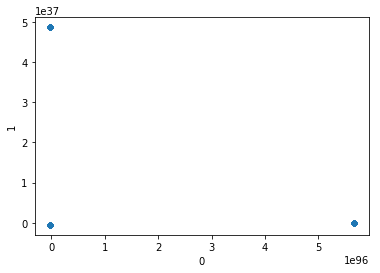

In [37]:
def plotDf(df):
    from sklearn.decomposition import PCA
    pca = PCA(n_components=2)
    #arr = pca.fit_transform(train_data_cleansed_1)
    ttt = df.drop('rent',axis=1)
    #arr = pca.fit_transform(ttt)
    arr = pca.fit_transform(ttt)
    df_plot = pd.DataFrame(arr)
    df_plot.plot.scatter(0,1)
    #plt.show()
plotDf(df)

In [38]:
clf_s = [SGDRegressor(), LassoCV(), ElasticNetCV(), RidgeCV(), \
         AdaBoostRegressor(), GradientBoostingRegressor(), \
         XGBRegressor()]#, SVR(kernel='linear')]

for c in clf_s:
    c.fit(X_train, y_train)
    print(c,c.score(X_test, y_test))

C:\Users\padmaraj.bhat\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.01,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', max_iter=None, n_iter=None, penalty='l2',
       power_t=0.25, random_state=None, shuffle=True, tol=None, verbose=0,
       warm_start=False) 0.6553951694366469
LassoCV(alphas=None, copy_X=True, cv=None, eps=0.001, fit_intercept=True,
    max_iter=1000, n_alphas=100, n_jobs=1, normalize=False, positive=False,
    precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
    verbose=False) 0.6967087559288505
ElasticNetCV(alphas=None, copy_X=True, cv=None, eps=0.001, fit_intercept=True,
       l1_ratio=0.5, max_iter=1000, n_alphas=100, n_jobs=1,
       normalize=False, positive=False, precompute='auto',
       random_state=None, selection='cyclic', tol=0.0001, verbose=0) 0.6966927459496736
RidgeCV(alphas=(0.1, 1.0, 10.0), cv=None, fit_intercept=True, gcv_mode=None,
    normalize=False, scoring=None, store_cv_values

In [39]:
X,y,dummy_X,dummy_y = returnTrainTestSet(
                                boxCoxTranformation(preProcessTheData(readtheTrainData('TestData_PA.csv').fillna('NA'))),
                                .99999,
                                1986)

Shape of the data set before transforming :  (12132, 40)
Shape of the data set after transforming :  (12132, 44) 

Shape of the dataset before transformation :  (12132, 44)
Ignoring the columns.... []
Performing column transformations for : ['rent', 'cemetery_dist_miles', 'nationalhighway_miles', 'railline_miles', 'starbucks_miles', 'walmart_miles', 'hospital_miles', 'physician_dist_miles', 'dentist_dist_miles', 'opt_dist_miles', 'vet_dist_miles', 'farmers_miles', 'bed', 'bath', 'halfbath', 'sqft', 'garage', 'yearbuilt', 'pool', 'fireplace', 'patio', 'lotsize', 'Census_MedianIncome', 'CollegeGrads', 'WhiteCollar', 'Schools', 'Unemployment', 'EmploymentDiversity', 'Census_Vacancy', 'Crime_Rate', 'HomePrice', 'x', 'y', 'z', 2015.25, 2015.5, 2015.75, 2016.25, 'Condo', 'Duplex', 'NA', 'Quadplex', 'SFR', 'Triplex']

Shape of the data set before min max scaling :  (12132, 44)

Shape of the data set post min max scaling :  (12132, 44)
Shape of the dataset after transformation :  (12132, 44)
I

In [41]:
print(clf_s[-1])
print("Final Score : ", clf_s[-1].score(X,y))
printStats(clf_s[-1].predict(X),y)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)
Final Score :  0.6582581905370731
11.76 % of properties within predicted rent within 1% of actual rent
23.47 % of properties within predicted rent within 2% of actual rent
34.85 % of properties within predicted rent within 3% of actual rent
45.38 % of properties within predicted rent within 4% of actual rent
55.11 % of properties within predicted rent within 5% of actual rent


In [43]:
print(clf_s[-2])
print("Final Score : ", clf_s[-2].score(X,y))
printStats(clf_s[-2].predict(X),y)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)
Final Score :  0.6611081364469438
11.92 % of properties within predicted rent within 1% of actual rent
23.58 % of properties within predicted rent within 2% of actual rent
34.84 % of properties within predicted rent within 3% of actual rent
45.43 % of properties within predicted rent within 4% of actual rent
55.0 % of properties within predicted rent within 5% of actual rent


In [44]:
#for i in list(range(1,25,1)):
for i in list(range(1,2,1)):
    my_model = XGBRegressor(max_depth=i)
    my_model.fit(X_train,y_train)
    print("With max_depth =",i,", validation score :",my_model.score(X_test,y_test))
    printStats(my_model.predict(X_test),y_test)

With max_depth = 1 , validation score : 0.6863494127858264
13.96 % of properties within predicted rent within 1% of actual rent
28.06 % of properties within predicted rent within 2% of actual rent
40.19 % of properties within predicted rent within 3% of actual rent
51.03 % of properties within predicted rent within 4% of actual rent
61.08 % of properties within predicted rent within 5% of actual rent


* With max_depth = 1 , validation score : 0.6863494127858264
  * 13.96 % of properties * Within predicted rent * Within 1% of actual rent
  * 28.06 % of properties * Within predicted rent * Within 2% of actual rent
  * 40.19 % of properties * Within predicted rent * Within 3% of actual rent
  * 51.03 % of properties * Within predicted rent * Within 4% of actual rent
  * 61.08 % of properties * Within predicted rent * Within 5% of actual rent
* With max_depth = 2 , validation score : 0.743588044813448
  * 16.08 % of properties * Within predicted rent * Within 1% of actual rent
  * 30.72 % of properties * Within predicted rent * Within 2% of actual rent
  * 44.32 % of properties * Within predicted rent * Within 3% of actual rent
  * 56.25 % of properties * Within predicted rent * Within 4% of actual rent
  * 65.78 % of properties * Within predicted rent * Within 5% of actual rent
* With max_depth = 3 , validation score : 0.7725393748835422
  * 17.11 % of properties * Within predicted rent * Within 1% of actual rent
  * 33.54 % of properties * Within predicted rent * Within 2% of actual rent
  * 47.94 % of properties * Within predicted rent * Within 3% of actual rent
  * 58.94 % of properties * Within predicted rent * Within 4% of actual rent
  * 68.57 % of properties * Within predicted rent * Within 5% of actual rent
* With max_depth = 4 , validation score : 0.7898376733936766
  * 17.68 % of properties * Within predicted rent * Within 1% of actual rent
  * 35.42 % of properties * Within predicted rent * Within 2% of actual rent
  * 49.52 % of properties * Within predicted rent * Within 3% of actual rent
  * 61.04 % of properties * Within predicted rent * Within 4% of actual rent
  * 70.91 % of properties * Within predicted rent * Within 5% of actual rent
* With max_depth = 5 , validation score : 0.8048543919802973
  * 18.34 % of properties * Within predicted rent * Within 1% of actual rent
  * 36.26 % of properties * Within predicted rent * Within 2% of actual rent
  * 51.59 % of properties * Within predicted rent * Within 3% of actual rent
  * 63.79 % of properties * Within predicted rent * Within 4% of actual rent
  * 72.7 % of properties * Within predicted rent * Within 5% of actual rent
* With max_depth = 6 , validation score : 0.8139143916212938
  * 19.63 % of properties * Within predicted rent * Within 1% of actual rent
  * 37.63 % of properties * Within predicted rent * Within 2% of actual rent
  * 53.17 % of properties * Within predicted rent * Within 3% of actual rent
  * 65.25 % of properties * Within predicted rent * Within 4% of actual rent
  * 74.24 % of properties * Within predicted rent * Within 5% of actual rent
* With max_depth = 7 , validation score : 0.8204072465345934
  * 20.13 % of properties * Within predicted rent * Within 1% of actual rent
  * 39.64 % of properties * Within predicted rent * Within 2% of actual rent
  * 53.98 % of properties * Within predicted rent * Within 3% of actual rent
  * 66.19 % of properties * Within predicted rent * Within 4% of actual rent
  * 75.55 % of properties * Within predicted rent * Within 5% of actual rent
* With max_depth = 8 , validation score : 0.8209035089133991
  * 20.43 % of properties * Within predicted rent * Within 1% of actual rent
  * 39.27 % of properties * Within predicted rent * Within 2% of actual rent
  * 54.85 % of properties * Within predicted rent * Within 3% of actual rent
  * 66.76 % of properties * Within predicted rent * Within 4% of actual rent
  * 76.01 % of properties * Within predicted rent * Within 5% of actual rent
* With max_depth = 9 , validation score : 0.8257202029547227
  * 21.4 % of properties * Within predicted rent * Within 1% of actual rent
  * 40.1 % of properties * Within predicted rent * Within 2% of actual rent
  * 55.75 % of properties * Within predicted rent * Within 3% of actual rent
  * 67.42 % of properties * Within predicted rent * Within 4% of actual rent
  * 76.53 % of properties * Within predicted rent * Within 5% of actual rent
* With max_depth = 10 , validation score : 0.8226474500426486
  * 21.42 % of properties * Within predicted rent * Within 1% of actual rent
  * 40.89 % of properties * Within predicted rent * Within 2% of actual rent
  * 56.14 % of properties * Within predicted rent * Within 3% of actual rent
  * 67.74 % of properties * Within predicted rent * Within 4% of actual rent
  * 76.79 % of properties * Within predicted rent * Within 5% of actual rent
* With max_depth = 11 , validation score : 0.8227014541795188
  * 21.92 % of properties * Within predicted rent * Within 1% of actual rent
  * 40.93 % of properties * Within predicted rent * Within 2% of actual rent
  * 56.47 % of properties * Within predicted rent * Within 3% of actual rent
  * 68.31 % of properties * Within predicted rent * Within 4% of actual rent
  * 76.81 % of properties * Within predicted rent * Within 5% of actual rent
* With max_depth = 12 , validation score : 0.8197189861807751
  * 22.44 % of properties * Within predicted rent * Within 1% of actual rent
  * 41.8 % of properties * Within predicted rent * Within 2% of actual rent
  * 56.43 % of properties * Within predicted rent * Within 3% of actual rent
  * 68.23 % of properties * Within predicted rent * Within 4% of actual rent
  * 77.03 % of properties * Within predicted rent * Within 5% of actual rent
* With max_depth = 13 , validation score : 0.8192652626588144
  * 22.36 % of properties * Within predicted rent * Within 1% of actual rent
  * 41.7 % of properties * Within predicted rent * Within 2% of actual rent
  * 56.71 % of properties * Within predicted rent * Within 3% of actual rent
  * 68.42 % of properties * Within predicted rent * Within 4% of actual rent
  * 76.86 % of properties * Within predicted rent * Within 5% of actual rent
* With max_depth = 14 , validation score : 0.8128394775678831
  * 22.38 % of properties * Within predicted rent * Within 1% of actual rent
  * 41.33 % of properties * Within predicted rent * Within 2% of actual rent
  * 56.4 % of properties * Within predicted rent * Within 3% of actual rent
  * 67.39 % of properties * Within predicted rent * Within 4% of actual rent
  * 75.85 % of properties * Within predicted rent * Within 5% of actual rent
* With max_depth = 15 , validation score : 0.8113263365388269
  * 22.2 % of properties * Within predicted rent * Within 1% of actual rent
  * 41.04 % of properties * Within predicted rent * Within 2% of actual rent
  * 56.38 % of properties * Within predicted rent * Within 3% of actual rent
  * 67.16 % of properties * Within predicted rent * Within 4% of actual rent
  * 76.14 % of properties * Within predicted rent * Within 5% of actual rent
* With max_depth = 16 , validation score : 0.811502656471116
  * 22.68 % of properties * Within predicted rent * Within 1% of actual rent
  * 41.33 % of properties * Within predicted rent * Within 2% of actual rent
  * 56.29 % of properties * Within predicted rent * Within 3% of actual rent
  * 67.18 % of properties * Within predicted rent * Within 4% of actual rent
  * 75.7 % of properties * Within predicted rent * Within 5% of actual rent
* With max_depth = 17 , validation score : 0.807636872073507
  * 22.75 % of properties * Within predicted rent * Within 1% of actual rent
  * 40.86 % of properties * Within predicted rent * Within 2% of actual rent
  * 55.64 % of properties * Within predicted rent * Within 3% of actual rent
  * 66.89 % of properties * Within predicted rent * Within 4% of actual rent
  * 75.74 % of properties * Within predicted rent * Within 5% of actual rent
* With max_depth = 18 , validation score : 0.8063141159372382
  * 22.27 % of properties * Within predicted rent * Within 1% of actual rent
  * 41.32 % of properties * Within predicted rent * Within 2% of actual rent
  * 55.57 % of properties * Within predicted rent * Within 3% of actual rent
  * 66.85 % of properties * Within predicted rent * Within 4% of actual rent
  * 75.35 % of properties * Within predicted rent * Within 5% of actual rent
* With max_depth = 19 , validation score : 0.8078892142569395
  * 22.12 % of properties * Within predicted rent * Within 1% of actual rent
  * 41.61 % of properties * Within predicted rent * Within 2% of actual rent
  * 56.12 % of properties * Within predicted rent * Within 3% of actual rent
  * 66.87 % of properties * Within predicted rent * Within 4% of actual rent
  * 75.41 % of properties * Within predicted rent * Within 5% of actual rent
* With max_depth = 20 , validation score : 0.8059023815742101
  * 22.55 % of properties * Within predicted rent * Within 1% of actual rent
  * 41.39 % of properties * Within predicted rent * Within 2% of actual rent
  * 55.29 % of properties * Within predicted rent * Within 3% of actual rent
  * 66.78 % of properties * Within predicted rent * Within 4% of actual rent
  * 75.44 % of properties * Within predicted rent * Within 5% of actual rent
* With max_depth = 21 , validation score : 0.8059025511890361
  * 23.62 % of properties * Within predicted rent * Within 1% of actual rent
  * 41.39 % of properties * Within predicted rent * Within 2% of actual rent
  * 55.38 % of properties * Within predicted rent * Within 3% of actual rent
  * 66.76 % of properties * Within predicted rent * Within 4% of actual rent
  * 75.2 % of properties * Within predicted rent * Within 5% of actual rent
* With max_depth = 22 , validation score : 0.8058353324499763
  * 22.18 % of properties * Within predicted rent * Within 1% of actual rent
  * 41.06 % of properties * Within predicted rent * Within 2% of actual rent
  * 55.37 % of properties * Within predicted rent * Within 3% of actual rent
  * 66.19 % of properties * Within predicted rent * Within 4% of actual rent
  * 75.09 % of properties * Within predicted rent * Within 5% of actual rent
* With max_depth = 23 , validation score : 0.8054031942748261
  * 22.47 % of properties * Within predicted rent * Within 1% of actual rent
  * 41.06 % of properties * Within predicted rent * Within 2% of actual rent
  * 55.13 % of properties * Within predicted rent * Within 3% of actual rent
  * 66.59 % of properties * Within predicted rent * Within 4% of actual rent
  * 75.07 % of properties * Within predicted rent * Within 5% of actual rent
* With max_depth = 24 , validation score : 0.8044559490446919
  * 21.92 % of properties * Within predicted rent * Within 1% of actual rent
  * 40.95 % of properties * Within predicted rent * Within 2% of actual rent
  * 55.11 % of properties * Within predicted rent * Within 3% of actual rent
  * 66.87 % of properties * Within predicted rent * Within 4% of actual rent
75.52 % of properties * Within predicted rent * Within 5% of actual rent

###### Case 1:
* With max_depth = 9 , validation score : 0.8257202029547227
  * 21.4 % of properties within predicted rent within 1% of actual rent
  * 40.1 % of properties within predicted rent within 2% of actual rent
  * 55.75 % of properties within predicted rent within 3% of actual rent
  * 67.42 % of properties within predicted rent within 4% of actual rent
  * 76.53 % of properties within predicted rent within 5% of actual rent


###### Case 2:
  * With max_depth = 12 , validation score : 0.8197189861807751
    * 22.44 % of properties within predicted rent within 1% of actual rent
    * 41.8 % of properties within predicted rent within 2% of actual rent
    * 56.43 % of properties within predicted rent within 3% of actual rent
    * 68.23 % of properties within predicted rent within 4% of actual rent
    * 77.03 % of properties within predicted rent within 5% of actual rent

###### Case 1 has comparitively high validation score but comparitively low percentage of accurate values.
###### Case 2 has inverse of Case 1. High percentage of accurate values but low validation score.
###### I would prefer Case 1 because the later may be the case of overfitting. We can verify it with actual test data.

In [45]:
def getTrainingAndTestingScore():
    valid_score=[]
    test_score =[]
    for i in list(range(1,20,1)):
        my_model = XGBRegressor(max_depth=i)
        my_model.fit(X_train,y_train)
        
        valid_score.append(my_model.score(X_test,y_test))
        test_score.append(my_model.score(X,y))
        
        
        print("\nWith max_depth =",i,", Validation Score :",my_model.score(X_test,y_test), ", Testing Score :",my_model.score(X,y))
        print("As per Competetion Evaluation Metrics : ")
        printStats(my_model.predict(X),y)
        
    plt_df = pd.DataFrame({'max_depth':list(range(1,20,1)),
                            'valid_score' : valid_score,
                            'test_score' : test_score
                           })
    return plt_df
plt_df = getTrainingAndTestingScore()


With max_depth = 1 , Validation Score : 0.6863494127858264 , Testing Score : 0.6402061559613093
As per Competetion Evaluation Metrics : 
12.38 % of properties within predicted rent within 1% of actual rent
24.68 % of properties within predicted rent within 2% of actual rent
36.13 % of properties within predicted rent within 3% of actual rent
46.37 % of properties within predicted rent within 4% of actual rent
56.18 % of properties within predicted rent within 5% of actual rent

With max_depth = 2 , Validation Score : 0.7436139614911907 , Testing Score : 0.66145672394906
As per Competetion Evaluation Metrics : 
12.75 % of properties within predicted rent within 1% of actual rent
24.97 % of properties within predicted rent within 2% of actual rent
36.47 % of properties within predicted rent within 3% of actual rent
47.0 % of properties within predicted rent within 4% of actual rent
56.58 % of properties within predicted rent within 5% of actual rent

With max_depth = 3 , Validation Scor


With max_depth = 18 , Validation Score : 0.8051609730412594 , Testing Score : 0.5753069163825337
As per Competetion Evaluation Metrics : 
9.99 % of properties within predicted rent within 1% of actual rent
20.16 % of properties within predicted rent within 2% of actual rent
30.51 % of properties within predicted rent within 3% of actual rent
40.33 % of properties within predicted rent within 4% of actual rent
49.37 % of properties within predicted rent within 5% of actual rent

With max_depth = 19 , Validation Score : 0.8072302650363684 , Testing Score : 0.612916995961861
As per Competetion Evaluation Metrics : 
11.19 % of properties within predicted rent within 1% of actual rent
22.42 % of properties within predicted rent within 2% of actual rent
33.57 % of properties within predicted rent within 3% of actual rent
43.43 % of properties within predicted rent within 4% of actual rent
52.49 % of properties within predicted rent within 5% of actual rent


plt_df
#plt_df.plot('max_depth','valid_score')

def tempdf(plt_df):
    max_depth = plt_df.max_depth.tolist()[0]
    valid_score = plt_df.valid_score.tolist()[0]
    test_score = plt_df.test_score.tolist()[0]
    #print(max_depth,test_score,valid_score)
    return pd.DataFrame({
        'max_depth' :max_depth,
        'valid_score' :valid_score,
        'test_score' :test_score
    })
    
plt_df_new = tempdf(plt_df)

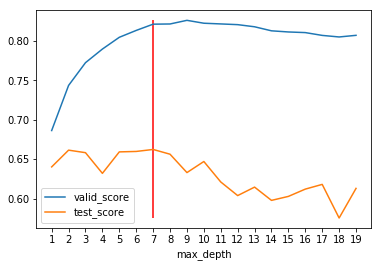

In [51]:
def plotDf(df):
    fig, ax = plt.subplots()
    df.plot.line('max_depth','valid_score',ax=ax, xticks=df.max_depth)
    df.plot.line('max_depth','test_score',ax=ax)

    vline = df[df.test_score == df.test_score.max()]['max_depth']
    if df.valid_score.min() < df.test_score.min():
        ax.vlines(vline,df.valid_score.min(),df.test_score.max(),'r')
    else:
        ax.vlines(vline,df.test_score.min(),df.valid_score.max(),'r')
        #ax.vlines(vline,0,df.valid_score.max(),'r')
    plt.show()

plotDf(plt_df)

##### It is quite clear now, the training score and testing score converge at max_depth=7

In [49]:
def getTrainingAndTestingScoreGrad():
    valid_score=[]
    test_score =[]
    for i in list(range(1,15,1)):
        my_model = GradientBoostingRegressor(max_depth=i)
        my_model.fit(X_train,y_train)
        
        valid_score.append(my_model.score(X_test,y_test))
        test_score.append(my_model.score(X,y))
        
        
        print("\nWith max_depth =",i,", Validation Score :",my_model.score(X_test,y_test), ", Testing Score :",my_model.score(X,y))
        print("As per Competetion Evaluation Metrics : ")
        printStats(my_model.predict(X),y)
        
    plt_df = pd.DataFrame({'max_depth':list(range(1,15,1)),
                            'valid_score' : valid_score,
                            'test_score' : test_score
                           })
    return plt_df
plt_df_grad = getTrainingAndTestingScoreGrad()


With max_depth = 1 , Validation Score : 0.6864129003135728 , Testing Score : 0.6402510495210882
As per Competetion Evaluation Metrics : 
12.39 % of properties within predicted rent within 1% of actual rent
24.68 % of properties within predicted rent within 2% of actual rent
36.13 % of properties within predicted rent within 3% of actual rent
46.39 % of properties within predicted rent within 4% of actual rent
56.21 % of properties within predicted rent within 5% of actual rent

With max_depth = 2 , Validation Score : 0.744400473117201 , Testing Score : 0.6668394150174223
As per Competetion Evaluation Metrics : 
12.7 % of properties within predicted rent within 1% of actual rent
25.41 % of properties within predicted rent within 2% of actual rent
36.92 % of properties within predicted rent within 3% of actual rent
47.58 % of properties within predicted rent within 4% of actual rent
57.12 % of properties within predicted rent within 5% of actual rent

With max_depth = 3 , Validation Sco

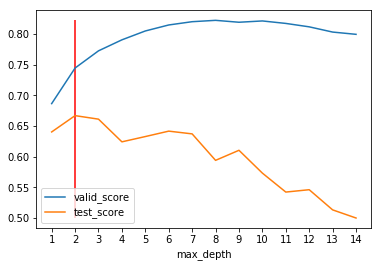

In [52]:
plotDf(plt_df_grad)

##### When compared with that of XBoost, Gradient descent regressor did not give a smoother decline for the testing score. However, we can see around max_depth in between 5-7 we have test score being stable/flat. XGBoost not only gave better result but also took much less time to train.

###### The best score from XGBoost is :
* With max_depth = 7 , Validation Score : 0.8214019307037783 , Testing Score : 0.6623369467737954
* As per Competetion Evaluation Metrics : 
  * 11.61 % of properties within predicted rent within 1% of actual rent
  * 23.43 % of properties within predicted rent within 2% of actual rent
  * 35.06 % of properties within predicted rent within 3% of actual rent
  * 46.1 % of properties within predicted rent within 4% of actual rent
  * 55.48 % of properties within predicted rent within 5% of actual rent